In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import shapely
import re
%matplotlib inline

In [2]:
projects = pd.read_excel('data/Project_Upload_20180803.xlsx')

projects.head()

,Address,Units,Closing Year,"Lon, Lat",Region Taxonomy
0,Berkshire Portfolio - Sturbridge Meadows,104,2018,"[-72.0643148, 42.1156917]",Massachusetts
1,"71-75 Hall Road, Sturbridge, MA",104,2009,"[-72.068932, 42.11519]",Massachusetts
2,"74 Bank Street, New London, CT",2,2009,"[-72.094398, 41.3529733]",Connecticut
3,Berkshire Portfolio - Van Deene Manor,111,2018,"[-72.6245572, 42.1043793]",Massachusetts
4,"39 Van Deene Manor, West Springfield, MA",111,2009,"[-72.625503, 42.104352]",Massachusetts


In [3]:
projects.index

RangeIndex(start=0, stop=3714, step=1)

In [4]:
len(projects)

3714

In [5]:
import re
projects['Lon, Lat'] = projects['Lon, Lat'].astype('str')

#projects['latitude'] = projects['Lon, Lat'].apply(lambda x: re.sub('(?<=\[)(.*?)(?=\,)', x))
#projects['longitude'] = projects['Lon, Lat'].apply(lambda x: re.sub('(?<=\, )(.*?)(?=\])', x))

#for x in projects['Lon, Lat']:
#    projects['latitude'] = x.str.extract(r'(?<=\[)(.*?)(?=\,)')
#    projects['longitude'] = x.str.extract(r'(?<=\, )(.*?)(?=\])')

projects['latitude'] = projects['Lon, Lat'].str.extract(r'(?<=\, )(.*?)(?=\])')
projects['longitude'] = projects['Lon, Lat'].str.extract(r'(?<=\[)(.*?)(?=\,)')

#projects['longitude'] = pd.to_numeric(projects['longitude'])
#projects['latitude'] = pd.to_numeric(projects['latitude'])

projects.head(20)

,Address,Units,Closing Year,"Lon, Lat",Region Taxonomy,latitude,longitude
0,Berkshire Portfolio - Sturbridge Meadows,104,2018,"[-72.0643148, 42.1156917]",Massachusetts,42.1156917,-72.0643148
1,"71-75 Hall Road, Sturbridge, MA",104,2009,"[-72.068932, 42.11519]",Massachusetts,42.11519,-72.068932
2,"74 Bank Street, New London, CT",2,2009,"[-72.094398, 41.3529733]",Connecticut,41.3529733,-72.094398
3,Berkshire Portfolio - Van Deene Manor,111,2018,"[-72.6245572, 42.1043793]",Massachusetts,42.1043793,-72.6245572
4,"39 Van Deene Manor, West Springfield, MA",111,2009,"[-72.625503, 42.104352]",Massachusetts,42.104352,-72.625503
5,"2 Belden Court, Agawam, MA",88,2009,"[-72.6346601, 42.0626504]",Massachusetts,42.0626504,-72.6346601
6,Berkshire Portfolio - Coachlight Village,88,2018,"[-72.6354901, 42.0628107]",Massachusetts,42.0628107,-72.6354901
7,"Concern Riverhead, Riverhead, NY",50,2015,"[-72.6620402, 40.9170435]",New York City,40.9170435,-72.6620402
8,"260 West Main Street, Riverhead, NY",50,2006,"[-72.6670597, 40.9178414]",New York City,40.9178414,-72.6670597
9,"46 South Street, Hartford, CT",6,2008,"[-72.6729702, 41.7357832]",Connecticut,41.7357832,-72.6729702


In [6]:
projects.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3714 entries, 0 to 3713
Data columns (total 7 columns):
Address            3714 non-null object
Units              3714 non-null int64
Closing Year       3714 non-null int64
Lon, Lat           3714 non-null object
Region Taxonomy    3714 non-null object
latitude           3714 non-null object
longitude          3714 non-null object
dtypes: int64(2), object(5)
memory usage: 203.2+ KB


In [7]:
projects['longitude'] = pd.to_numeric(projects['longitude'])
projects['latitude'] = pd.to_numeric(projects['latitude'])

In [9]:
# Create shapely points for data

from shapely.geometry import Point

# creating a geometry column 
geometry = [Point(xy) for xy in zip(projects['longitude'], projects['latitude'])]

# Coordinate reference system : WGS84
crs = {'init': 'epsg:4326'}

# Creating a Geographic data frame 
gdf = gpd.GeoDataFrame(projects, crs=crs, geometry=geometry)

In [10]:
gdf.head()

,Address,Units,Closing Year,"Lon, Lat",Region Taxonomy,latitude,longitude,geometry
0,Berkshire Portfolio - Sturbridge Meadows,104,2018,"[-72.0643148, 42.1156917]",Massachusetts,42.115692,-72.064315,POINT (-72.06431479999999 42.1156917)
1,"71-75 Hall Road, Sturbridge, MA",104,2009,"[-72.068932, 42.11519]",Massachusetts,42.115190,-72.068932,POINT (-72.06893199999999 42.11519000000001)
2,"74 Bank Street, New London, CT",2,2009,"[-72.094398, 41.3529733]",Connecticut,41.352973,-72.094398,POINT (-72.094398 41.3529733)
3,Berkshire Portfolio - Van Deene Manor,111,2018,"[-72.6245572, 42.1043793]",Massachusetts,42.104379,-72.624557,POINT (-72.6245572 42.1043793)
4,"39 Van Deene Manor, West Springfield, MA",111,2009,"[-72.625503, 42.104352]",Massachusetts,42.104352,-72.625503,POINT (-72.62550300000001 42.104352)


___

### Load the Counties

In [15]:
counties = gpd.read_file('data/cb_2017_us_county_5m/cb_2017_us_county_5m.shx')

counties.head()

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
0,04,015,00025445,0500000US04015,04015,Mohave,06,34475503964,387344307,"POLYGON ((-114.755618 36.087166, -114.753638 3..."
1,22,105,00559500,0500000US22105,22105,Tangipahoa,15,2049488093,136678798,"POLYGON ((-90.567171 30.824806, -90.567195 30...."
2,16,063,00395624,0500000US16063,16063,Lincoln,06,3111451190,11606076,"POLYGON ((-114.594605 43.198345, -114.374962 4..."
3,27,119,00659505,0500000US27119,27119,Polk,06,5105067510,69169913,"POLYGON ((-97.146672 48.171484, -97.1457019134..."
4,38,017,01034226,0500000US38017,38017,Cass,06,4571107601,7732062,"POLYGON ((-97.706034 47.239978, -97.4515119999..."


In [16]:
cpc_counties = counties.loc[(counties['STATEFP']=='09')|(counties['STATEFP']=='42')|
                            (counties['STATEFP']=='36')|(counties['STATEFP']=='34')|(counties['STATEFP']=='25')]

# check to see if that worked
cpc_counties['STATEFP'].nunique()

5

In [17]:
cpc_counties['STATEFP'].loc[(cpc_counties['STATEFP']=='09')] = 'CT'
cpc_counties['STATEFP'].loc[(cpc_counties['STATEFP']=='42')] = 'PA'
cpc_counties['STATEFP'].loc[(cpc_counties['STATEFP']=='36')] = 'NY'
cpc_counties['STATEFP'].loc[(cpc_counties['STATEFP']=='34')] = 'NJ'
cpc_counties['STATEFP'].loc[(cpc_counties['STATEFP']=='25')] = 'MA'

cpc_counties = cpc_counties.rename(columns={'STATEFP':'STATE'})

cpc_counties.head()

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: 

,STATE,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
6,NY,095,00974145,0500000US36095,36095,Schoharie,06,1610503572,11676949,"POLYGON ((-74.672428 42.564455, -74.6306309999..."
39,PA,075,01214034,0500000US42075,42075,Lebanon,06,937138344,1727921,"POLYGON ((-76.67804 40.474717, -76.535414 40.5..."
61,NY,099,00974147,0500000US36099,36099,Seneca,06,838403626,172828921,"POLYGON ((-76.978526 42.869072, -76.963365 42...."
66,NY,073,00974135,0500000US36073,36073,Orleans,06,1013366849,1103741896,"POLYGON ((-78.46550212002251 43.3712323915095,..."
136,NY,117,00974156,0500000US36117,36117,Wayne,06,1563903159,2018194942,"POLYGON ((-77.37603788042659 43.2776524189036,..."


In [18]:
cpc_counties.dtypes

STATE       object
COUNTYFP    object
COUNTYNS    object
AFFGEOID    object
GEOID       object
NAME        object
LSAD        object
ALAND        int64
AWATER       int64
geometry    object
dtype: object

In [19]:
cpc_counties.head()

,STATE,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
6,NY,095,00974145,0500000US36095,36095,Schoharie,06,1610503572,11676949,"POLYGON ((-74.672428 42.564455, -74.6306309999..."
39,PA,075,01214034,0500000US42075,42075,Lebanon,06,937138344,1727921,"POLYGON ((-76.67804 40.474717, -76.535414 40.5..."
61,NY,099,00974147,0500000US36099,36099,Seneca,06,838403626,172828921,"POLYGON ((-76.978526 42.869072, -76.963365 42...."
66,NY,073,00974135,0500000US36073,36073,Orleans,06,1013366849,1103741896,"POLYGON ((-78.46550212002251 43.3712323915095,..."
136,NY,117,00974156,0500000US36117,36117,Wayne,06,1563903159,2018194942,"POLYGON ((-77.37603788042659 43.2776524189036,..."


### Ready Counties to Merge with Sites

In [20]:
cpc_counties = cpc_counties.rename(columns={'NAME':'COUNTYNAME'})
counties = cpc_counties[['COUNTYNAME','STATE','geometry']]

counties['COUNTYNAME'] = counties['COUNTYNAME'] + ' - ' + counties['STATE']

counties.reset_index(inplace=True, drop=True)
counties.head()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,COUNTYNAME,STATE,geometry
0,Schoharie - NY,NY,"POLYGON ((-74.672428 42.564455, -74.6306309999..."
1,Lebanon - PA,PA,"POLYGON ((-76.67804 40.474717, -76.535414 40.5..."
2,Seneca - NY,NY,"POLYGON ((-76.978526 42.869072, -76.963365 42...."
3,Orleans - NY,NY,"POLYGON ((-78.46550212002251 43.3712323915095,..."
4,Wayne - NY,NY,"POLYGON ((-77.37603788042659 43.2776524189036,..."


In [16]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install rtree

  Using cached https://files.pythonhosted.org/packages/33/0d/0bcb0fdd759570e85697189f675fa462131e5636482f2832288bbe4bb6f7/Rtree-0.8.3-py3-none-any.whl
You are using pip version 19.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


### Merge counties and sites

In [21]:
from geopandas.tools import sjoin
sites_with_county = gpd.sjoin(gdf, counties, how="inner", op='intersects')

sites_with_county.head()

/usr/local/lib/python3.7/site-packages/geopandas/tools/sjoin.py:44: UserWarning: CRS of frames being joined does not match!
  warn('CRS of frames being joined does not match!')


,Address,Units,Closing Year,"Lon, Lat",Region Taxonomy,latitude,longitude,geometry,index_right,COUNTYNAME,STATE
0,Berkshire Portfolio - Sturbridge Meadows,104,2018,"[-72.0643148, 42.1156917]",Massachusetts,42.115692,-72.064315,POINT (-72.06431479999999 42.1156917),106,Worcester - MA,MA
1,"71-75 Hall Road, Sturbridge, MA",104,2009,"[-72.068932, 42.11519]",Massachusetts,42.115190,-72.068932,POINT (-72.06893199999999 42.11519000000001),106,Worcester - MA,MA
2,"74 Bank Street, New London, CT",2,2009,"[-72.094398, 41.3529733]",Connecticut,41.352973,-72.094398,POINT (-72.094398 41.3529733),83,New London - CT,CT
3,Berkshire Portfolio - Van Deene Manor,111,2018,"[-72.6245572, 42.1043793]",Massachusetts,42.104379,-72.624557,POINT (-72.6245572 42.1043793),50,Hampden - MA,MA
4,"39 Van Deene Manor, West Springfield, MA",111,2009,"[-72.625503, 42.104352]",Massachusetts,42.104352,-72.625503,POINT (-72.62550300000001 42.104352),50,Hampden - MA,MA


In [22]:
sites_with_county.columns

Index(['Address', 'Units', 'Closing Year', 'Lon, Lat', 'Region Taxonomy',
       'latitude', 'longitude', 'geometry', 'index_right', 'COUNTYNAME',
       'STATE'],
      dtype='object')

In [23]:
sites_with_county['Decade'] = np.where(sites_with_county['Closing Year'] >= 2010, '2010s',
                                      np.where((sites_with_county['Closing Year'] >= 2000)&(sites_with_county['Closing Year'] < 2010), '2000s',
                                               np.where((sites_with_county['Closing Year'] >= 1990)&(sites_with_county['Closing Year'] < 2000), '1990s',
                                                        np.where((sites_with_county['Closing Year'] >= 1980)&(sites_with_county['Closing Year'] < 1990), '1980s', '1970s'))))

In [24]:
sites_with_county['Closing Year'].describe()

count    3711.000000
mean     2001.871194
std         9.403481
min      1975.000000
25%      1997.000000
50%      2003.000000
75%      2007.000000
max      2018.000000
Name: Closing Year, dtype: float64

In [25]:
sites_with_county[['Address', 'Units', 'Closing Year','Decade']]

,Address,Units,Closing Year,Decade
0,Berkshire Portfolio - Sturbridge Meadows,104,2018,2010s
1,"71-75 Hall Road, Sturbridge, MA",104,2009,2000s
2,"74 Bank Street, New London, CT",2,2009,2000s
3,Berkshire Portfolio - Van Deene Manor,111,2018,2010s
4,"39 Van Deene Manor, West Springfield, MA",111,2009,2000s
5,"2 Belden Court, Agawam, MA",88,2009,2000s
6,Berkshire Portfolio - Coachlight Village,88,2018,2010s
12,Berkshire Portfolio - Security Manor,63,2018,2010s
13,"47 Broad Street, Westfield, MA",63,2009,2000s
7,"Concern Riverhead, Riverhead, NY",50,2015,2010s


### Create the Counties

In [26]:
CPC_sites = sites_with_county[['Address', 'Units', 'Closing Year', 'Decade', 'Lon, Lat','COUNTYNAME', 'STATE', 'Region Taxonomy',
                               'latitude', 'longitude', 'geometry']]

CPC_sites = CPC_sites.rename(columns={'COUNTYNAME':'County'})



CPC_sites.head()

,Address,Units,Closing Year,Decade,"Lon, Lat",County,STATE,Region Taxonomy,latitude,longitude,geometry
0,Berkshire Portfolio - Sturbridge Meadows,104,2018,2010s,"[-72.0643148, 42.1156917]",Worcester - MA,MA,Massachusetts,42.115692,-72.064315,POINT (-72.06431479999999 42.1156917)
1,"71-75 Hall Road, Sturbridge, MA",104,2009,2000s,"[-72.068932, 42.11519]",Worcester - MA,MA,Massachusetts,42.115190,-72.068932,POINT (-72.06893199999999 42.11519000000001)
2,"74 Bank Street, New London, CT",2,2009,2000s,"[-72.094398, 41.3529733]",New London - CT,CT,Connecticut,41.352973,-72.094398,POINT (-72.094398 41.3529733)
3,Berkshire Portfolio - Van Deene Manor,111,2018,2010s,"[-72.6245572, 42.1043793]",Hampden - MA,MA,Massachusetts,42.104379,-72.624557,POINT (-72.6245572 42.1043793)
4,"39 Van Deene Manor, West Springfield, MA",111,2009,2000s,"[-72.625503, 42.104352]",Hampden - MA,MA,Massachusetts,42.104352,-72.625503,POINT (-72.62550300000001 42.104352)


In [27]:
counties_info = CPC_sites.groupby(['County'])['Units'].describe()

counties_info = counties_info.reset_index()

counties_info = counties_info.rename(columns={'County':'COUNTYNAME', 'count':'TOTALUNITS','mean':'AVGUNITS', 
                                              'max':'LARGEST', 'min':'SMALLEST'})

In [28]:
counties_info = counties_info.merge(counties, on='COUNTYNAME', validate='many_to_many')

counties_info = counties_info.drop(['std','25%','50%','75%'],1)

counties_info = gpd.GeoDataFrame(counties_info)


counties_info

,COUNTYNAME,TOTALUNITS,AVGUNITS,SMALLEST,LARGEST,STATE,geometry
0,Albany - NY,148.0,27.695946,1.0,326.0,NY,"POLYGON ((-74.26486299999999 42.419863, -74.24..."
1,Allegany - NY,9.0,13.777778,1.0,109.0,NY,"POLYGON ((-78.30883899999999 42.521217, -78.04..."
2,Allegheny - PA,8.0,66.500000,24.0,200.0,PA,"POLYGON ((-80.278026 40.536736, -80.228579 40...."
3,Atlantic - NJ,3.0,75.666667,75.0,77.0,NJ,POLYGON ((-74.91188199999999 39.57846199999999...
4,Beaver - PA,1.0,120.000000,120.0,120.0,PA,"POLYGON ((-80.519086 40.616385, -80.5190389999..."
5,Bergen - NJ,1.0,40.000000,40.0,40.0,NJ,"POLYGON ((-74.270658 41.021033, -74.2504579999..."
6,Bronx - NY,467.0,57.453961,1.0,3985.0,NY,"POLYGON ((-73.93340599999999 40.882078, -73.92..."
7,Broome - NY,6.0,19.000000,1.0,46.0,NY,"POLYGON ((-76.13018099999999 42.410337, -76.05..."
8,Bucks - PA,2.0,120.000000,120.0,120.0,PA,"POLYGON ((-75.48405699999999 40.418451, -75.40..."
9,Burlington - NJ,6.0,10.166667,1.0,44.0,NJ,"POLYGON ((-75.059017 39.992512, -75.0512169999..."


In [29]:
counties_info.columns

Index(['COUNTYNAME', 'TOTALUNITS', 'AVGUNITS', 'SMALLEST', 'LARGEST', 'STATE',
       'geometry'],
      dtype='object')

In [30]:
leftovers = counties.loc[counties['COUNTYNAME'].isin(counties_info['COUNTYNAME'])==False]

leftovers.head()

,COUNTYNAME,STATE,geometry
0,Schoharie - NY,NY,"POLYGON ((-74.672428 42.564455, -74.6306309999..."
1,Lebanon - PA,PA,"POLYGON ((-76.67804 40.474717, -76.535414 40.5..."
6,Venango - PA,PA,"POLYGON ((-79.99977899999999 41.490049, -79.98..."
7,Greene - PA,PA,"POLYGON ((-80.519423 39.806181, -80.518891 39...."
10,Jefferson - PA,PA,"POLYGON ((-79.21019699999999 41.049091, -79.21..."


In [31]:
counties_info = counties_info.append(leftovers)

counties_info

/usr/local/lib/python3.7/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


,AVGUNITS,COUNTYNAME,LARGEST,SMALLEST,STATE,TOTALUNITS,geometry
0,27.695946,Albany - NY,326.0,1.0,NY,148.0,"POLYGON ((-74.26486299999999 42.419863, -74.24..."
1,13.777778,Allegany - NY,109.0,1.0,NY,9.0,"POLYGON ((-78.30883899999999 42.521217, -78.04..."
2,66.500000,Allegheny - PA,200.0,24.0,PA,8.0,"POLYGON ((-80.278026 40.536736, -80.228579 40...."
3,75.666667,Atlantic - NJ,77.0,75.0,NJ,3.0,POLYGON ((-74.91188199999999 39.57846199999999...
4,120.000000,Beaver - PA,120.0,120.0,PA,1.0,"POLYGON ((-80.519086 40.616385, -80.5190389999..."
5,40.000000,Bergen - NJ,40.0,40.0,NJ,1.0,"POLYGON ((-74.270658 41.021033, -74.2504579999..."
6,57.453961,Bronx - NY,3985.0,1.0,NY,467.0,"POLYGON ((-73.93340599999999 40.882078, -73.92..."
7,19.000000,Broome - NY,46.0,1.0,NY,6.0,"POLYGON ((-76.13018099999999 42.410337, -76.05..."
8,120.000000,Bucks - PA,120.0,120.0,PA,2.0,"POLYGON ((-75.48405699999999 40.418451, -75.40..."
9,10.166667,Burlington - NJ,44.0,1.0,NJ,6.0,"POLYGON ((-75.059017 39.992512, -75.0512169999..."


In [32]:
regions_left = leftovers[['COUNTYNAME','STATE']]

In [33]:
CPC_sites = CPC_sites.rename(columns={'County':'COUNTYNAME'})

grouped = CPC_sites.groupby(['COUNTYNAME','Region Taxonomy','STATE'])

result = grouped.agg('sum')

result = result.reset_index()

result = result.drop(['Units', 'Closing Year', 'latitude','longitude'],1)

result = result.append(regions_left)

result['Region Taxonomy'].loc[result['STATE']=='NJ'] = 'New Jersey'
result['Region Taxonomy'].loc[result['STATE']=='PA'] = 'Pennsylvania'
result['Region Taxonomy'].loc[result['STATE']=='CT'] = 'Connecticut'
result['Region Taxonomy'].loc[result['STATE']=='MA'] = 'Massachusetts'

result.loc[result['STATE']=='NY']

,COUNTYNAME,Region Taxonomy,STATE
0,Albany - NY,Capital,NY
1,Allegany - NY,Western,NY
6,Bronx - NY,New York City,NY
7,Broome - NY,Central,NY
11,Cattaraugus - NY,Western,NY
12,Cayuga - NY,Central,NY
13,Chautauqua - NY,Western,NY
14,Chemung - NY,Central,NY
15,Chenango - NY,Central,NY
16,Clinton - NY,Capital,NY


In [34]:
capital = ['Schoharie - NY', 'Essex - NY','Hamilton - NY']
central = ['Herkimer - NY','Schuyler - NY','Otsego - NY','Lewis - NY','Delaware - NY']

for i in capital: 
    result['Region Taxonomy'].loc[result['COUNTYNAME']==i] = 'Capital'
    
for i in central: 
    result['Region Taxonomy'].loc[result['COUNTYNAME']==i] = 'Central'

result.loc[result['STATE']=='NY'].tail()

,COUNTYNAME,Region Taxonomy,STATE
85,Essex - NY,Capital,NY
88,Otsego - NY,Central,NY
89,Hamilton - NY,Capital,NY
94,Lewis - NY,Central,NY
160,Delaware - NY,Central,NY


In [35]:
result = result.drop(['STATE'],1)

In [36]:
counties_info = counties_info.merge(result, on='COUNTYNAME', validate='many_to_many')

counties_info.tail()

,AVGUNITS,COUNTYNAME,LARGEST,SMALLEST,STATE,TOTALUNITS,geometry,Region Taxonomy
168,NaN,Huntingdon - PA,NaN,NaN,PA,NaN,"POLYGON ((-78.250091 40.31229099999999, -78.19...",Pennsylvania
169,NaN,Westmoreland - PA,NaN,NaN,PA,NaN,"POLYGON ((-79.90477799999999 40.157255, -79.90...",Pennsylvania
170,NaN,Bradford - PA,NaN,NaN,PA,NaN,"POLYGON ((-76.92188399999999 42.001674, -76.92...",Pennsylvania
171,NaN,Middlesex - MA,NaN,NaN,MA,NaN,"POLYGON ((-71.89877002948 42.7114218822193, -7...",Massachusetts
172,NaN,Franklin - PA,NaN,NaN,PA,NaN,"POLYGON ((-78.09897028757709 39.7224665432781,...",Pennsylvania


In [37]:
counties_info = counties_info.fillna(value=0)

counties_info['Region Taxonomy'] = counties_info['Region Taxonomy'].astype('category')

counties_info['region_code'] = counties_info['Region Taxonomy'].cat.codes 

counties_info.tail()

,AVGUNITS,COUNTYNAME,LARGEST,SMALLEST,STATE,TOTALUNITS,geometry,Region Taxonomy,region_code
168,0.0,Huntingdon - PA,0.0,0.0,PA,0.0,"POLYGON ((-78.250091 40.31229099999999, -78.19...",Pennsylvania,7
169,0.0,Westmoreland - PA,0.0,0.0,PA,0.0,"POLYGON ((-79.90477799999999 40.157255, -79.90...",Pennsylvania,7
170,0.0,Bradford - PA,0.0,0.0,PA,0.0,"POLYGON ((-76.92188399999999 42.001674, -76.92...",Pennsylvania,7
171,0.0,Middlesex - MA,0.0,0.0,MA,0.0,"POLYGON ((-71.89877002948 42.7114218822193, -7...",Massachusetts,4
172,0.0,Franklin - PA,0.0,0.0,PA,0.0,"POLYGON ((-78.09897028757709 39.7224665432781,...",Pennsylvania,7


In [38]:
counties_info.region_code = pd.to_numeric(counties_info.region_code)

In [39]:
counties_info.dtypes

AVGUNITS            float64
COUNTYNAME           object
LARGEST             float64
SMALLEST            float64
STATE                object
TOTALUNITS          float64
geometry             object
Region Taxonomy    category
region_code            int8
dtype: object

___

In [40]:
CPC_sites.head()

,Address,Units,Closing Year,Decade,"Lon, Lat",COUNTYNAME,STATE,Region Taxonomy,latitude,longitude,geometry
0,Berkshire Portfolio - Sturbridge Meadows,104,2018,2010s,"[-72.0643148, 42.1156917]",Worcester - MA,MA,Massachusetts,42.115692,-72.064315,POINT (-72.06431479999999 42.1156917)
1,"71-75 Hall Road, Sturbridge, MA",104,2009,2000s,"[-72.068932, 42.11519]",Worcester - MA,MA,Massachusetts,42.115190,-72.068932,POINT (-72.06893199999999 42.11519000000001)
2,"74 Bank Street, New London, CT",2,2009,2000s,"[-72.094398, 41.3529733]",New London - CT,CT,Connecticut,41.352973,-72.094398,POINT (-72.094398 41.3529733)
3,Berkshire Portfolio - Van Deene Manor,111,2018,2010s,"[-72.6245572, 42.1043793]",Hampden - MA,MA,Massachusetts,42.104379,-72.624557,POINT (-72.6245572 42.1043793)
4,"39 Van Deene Manor, West Springfield, MA",111,2009,2000s,"[-72.625503, 42.104352]",Hampden - MA,MA,Massachusetts,42.104352,-72.625503,POINT (-72.62550300000001 42.104352)


In [41]:
CPC_sites.COUNTYNAME.value_counts()

Kings - NY           925
New York - NY        522
Bronx - NY           467
Westchester - NY     304
Queens - NY          165
Albany - NY          148
Onondaga - NY        148
Dutchess - NY        129
Erie - NY             89
Orange - NY           85
Rensselaer - NY       75
Monroe - NY           59
Essex - NJ            51
Saratoga - NY         38
Rockland - NY         33
Mercer - NJ           29
Schenectady - NY      29
Suffolk - NY          28
Ulster - NY           28
Hudson - NJ           25
Nassau - NY           20
Camden - NJ           17
Richmond - NY         16
Warren - NY           15
Oswego - NY           15
Chemung - NY          14
Passaic - NJ          13
Columbia - NY         11
Niagara - NY          10
Monmouth - NJ         10
                    ... 
Greene - NY            4
Chautauqua - NY        4
Livingston - NY        3
Ocean - NJ             3
Yates - NY             3
Atlantic - NJ          3
Genesee - NY           3
Montgomery - NY        3
Wayne - NY             3


In [42]:
CPC_sites.loc[CPC_sites.COUNTYNAME == 'Bronx - NY']

,Address,Units,Closing Year,Decade,"Lon, Lat",COUNTYNAME,STATE,Region Taxonomy,latitude,longitude,geometry
439,"186 Cross Street, Bronx, NY",11,2005,2000s,"[-73.788112, 40.853433]",Bronx - NY,NY,New York City,40.853433,-73.788112,POINT (-73.788112 40.853433)
481,"24, Pennyfield Avenue, Brooklyn",15,2016,2010s,"[-73.8022841, 40.8098338]",Bronx - NY,NY,New York City,40.809834,-73.802284,POINT (-73.80228409999999 40.8098338)
550,"1800 Waring Avenue, Bronx, NY",200,1995,1990s,"[-73.8337987, 40.8603493]",Bronx - NY,NY,New York City,40.860349,-73.833799,POINT (-73.8337987 40.8603493)
556,"2851 Grace Avenue, Bronx, NY",14,2006,2000s,"[-73.83475, 40.868976]",Bronx - NY,NY,New York City,40.868976,-73.834750,POINT (-73.83475 40.868976)
561,"Arnow and Ely Avenues, Bronx, NY",66,2007,2000s,"[-73.8357342, 40.8696078]",Bronx - NY,NY,New York City,40.869608,-73.835734,POINT (-73.8357342 40.8696078)
565,"3356 Baychester Avenue, Bronx, NY",15,1999,1990s,"[-73.836794, 40.878428]",Bronx - NY,NY,New York City,40.878428,-73.836794,POINT (-73.836794 40.878428)
587,"1248 East 223rd Street, Bronx, NY",5,2007,2000s,"[-73.845393, 40.880641]",Bronx - NY,NY,New York City,40.880641,-73.845393,POINT (-73.845393 40.880641)
593,"3533 Eastchester Road, Bronx, NY",4,2007,2000s,"[-73.8476978, 40.8793893]",Bronx - NY,NY,New York City,40.879389,-73.847698,POINT (-73.84769780000001 40.8793893)
598,"2712 Sexton Avenue, Bronx, NY",6,2004,2000s,"[-73.848725, 40.867372]",Bronx - NY,NY,New York City,40.867372,-73.848725,POINT (-73.848725 40.867372)
601,"3012 Bouck Avenue, Bronx, NY",4,2007,2000s,"[-73.849769, 40.8698482]",Bronx - NY,NY,New York City,40.869848,-73.849769,POINT (-73.84976899999999 40.8698482)


___

### Combine Regions into DataFrame

In [43]:
counties_info['Region Taxonomy'].unique()

[Capital, Western, Pennsylvania, New Jersey, New York City, Central, Hudson Valley, Connecticut, Massachusetts]
Categories (9, object): [Capital, Western, Pennsylvania, New Jersey, ..., Central, Hudson Valley, Connecticut, Massachusetts]

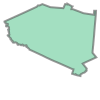

In [44]:
from shapely.geometry import Polygon
from shapely.ops import cascaded_union

reg_hud = counties_info['geometry'].loc[counties_info['Region Taxonomy'] == 'Hudson Valley'].tolist()

# cascaded union combines all the shapes into one
union = cascaded_union(reg_hud)

# Check and see if that worked
union

In [45]:
regions_geom = []

# loop through all the regions to return their geometry

for region in counties_info['Region Taxonomy'].unique():
    reg = counties_info['geometry'].loc[counties_info['Region Taxonomy'] == region].tolist()
    union = cascaded_union(reg)
    regions_geom.append(union)
    
regions = pd.DataFrame()

regions['Region Taxonomy'] = counties_info['Region Taxonomy'].unique()
regions['geometry'] = regions_geom

regions_gpd = gpd.GeoDataFrame(regions, geometry=regions['geometry'])

regions_gpd

,Region Taxonomy,geometry
0,Capital,"POLYGON ((-73.921465 42.110025, -73.910675 42...."
1,Western,"POLYGON ((-78.03826099999999 42.521522, -78.04..."
2,Pennsylvania,"POLYGON ((-80.519423 39.806181, -80.518891 39...."
3,New Jersey,"POLYGON ((-74.97199499999999 38.94037, -74.955..."
4,New York City,"(POLYGON ((-74.258556 40.506232, -74.25166 40...."
5,Central,"(POLYGON ((-76.453732 43.890572, -76.412138 43..."
6,Hudson Valley,"POLYGON ((-73.54472799999999 41.366375, -73.54..."
7,Connecticut,"POLYGON ((-73.72777499999999 41.100696, -73.69..."
8,Massachusetts,"(POLYGON ((-70.826503 41.259594, -70.817263 41..."


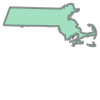

In [46]:
union

In [47]:
CPC_sites.columns

Index(['Address', 'Units', 'Closing Year', 'Decade', 'Lon, Lat', 'COUNTYNAME',
       'STATE', 'Region Taxonomy', 'latitude', 'longitude', 'geometry'],
      dtype='object')

In [48]:
CPC_sites

,Address,Units,Closing Year,Decade,"Lon, Lat",COUNTYNAME,STATE,Region Taxonomy,latitude,longitude,geometry
0,Berkshire Portfolio - Sturbridge Meadows,104,2018,2010s,"[-72.0643148, 42.1156917]",Worcester - MA,MA,Massachusetts,42.115692,-72.064315,POINT (-72.06431479999999 42.1156917)
1,"71-75 Hall Road, Sturbridge, MA",104,2009,2000s,"[-72.068932, 42.11519]",Worcester - MA,MA,Massachusetts,42.115190,-72.068932,POINT (-72.06893199999999 42.11519000000001)
2,"74 Bank Street, New London, CT",2,2009,2000s,"[-72.094398, 41.3529733]",New London - CT,CT,Connecticut,41.352973,-72.094398,POINT (-72.094398 41.3529733)
3,Berkshire Portfolio - Van Deene Manor,111,2018,2010s,"[-72.6245572, 42.1043793]",Hampden - MA,MA,Massachusetts,42.104379,-72.624557,POINT (-72.6245572 42.1043793)
4,"39 Van Deene Manor, West Springfield, MA",111,2009,2000s,"[-72.625503, 42.104352]",Hampden - MA,MA,Massachusetts,42.104352,-72.625503,POINT (-72.62550300000001 42.104352)
5,"2 Belden Court, Agawam, MA",88,2009,2000s,"[-72.6346601, 42.0626504]",Hampden - MA,MA,Massachusetts,42.062650,-72.634660,POINT (-72.63466009999999 42.0626504)
6,Berkshire Portfolio - Coachlight Village,88,2018,2010s,"[-72.6354901, 42.0628107]",Hampden - MA,MA,Massachusetts,42.062811,-72.635490,POINT (-72.6354901 42.0628107)
12,Berkshire Portfolio - Security Manor,63,2018,2010s,"[-72.749008, 42.1180691]",Hampden - MA,MA,Massachusetts,42.118069,-72.749008,POINT (-72.74900799999999 42.1180691)
13,"47 Broad Street, Westfield, MA",63,2009,2000s,"[-72.74919, 42.1180281]",Hampden - MA,MA,Massachusetts,42.118028,-72.749190,POINT (-72.74919 42.1180281)
7,"Concern Riverhead, Riverhead, NY",50,2015,2010s,"[-72.6620402, 40.9170435]",Suffolk - NY,NY,New York City,40.917043,-72.662040,POINT (-72.66204020000001 40.9170435)


In [50]:
CPC_sites.groupby(['Region Taxonomy'])['Units'].sum()

Region Taxonomy
Capital          11185
Central          12513
Connecticut        114
Hudson Valley    16082
Massachusetts      732
New Jersey        5452
New York City    85423
Pennsylvania      1493
Western           4068
Name: Units, dtype: int64

In [51]:
CPC_sites.groupby(['Region Taxonomy'])['Units'].count()

Region Taxonomy
Capital           343
Central           303
Connecticut        13
Hudson Valley     590
Massachusetts       8
New Jersey        169
New York City    2143
Pennsylvania       16
Western           126
Name: Units, dtype: int64

In [52]:
counties_info['geometry'].loc[counties_info['Region Taxonomy'] == 'Central'].tolist()

In [53]:
nyc = gpd.read_file('regions/NYC_LI_Shapefile/NYC_LI_Shapefile.shx')
nyc['Region Taxonomy'] = 'New York City'

hudson = gpd.read_file('regions/Hudson_Valley/Hudson_Valley.shx')
hudson['Region Taxonomy'] = 'Hudson Valley'

central = gpd.read_file('regions/Central_Region/Central_Region.shx')
central['Region Taxonomy'] = 'Central'

capital = gpd.read_file('regions/Capital_Region/Capital_Region.shx')
capital['Region Taxonomy'] = 'Capital'

connecticut = gpd.read_file('regions/Connecticut/Connecticut.shx')
connecticut['Region Taxonomy'] = 'Connecticut'

massachusetts = gpd.read_file('regions/Massachusetts/Massachusetts.shx')
massachusetts['Region Taxonomy'] = 'Massachusetts'

jersey = gpd.read_file('regions/New_Jersey/New_Jersey.shx')
jersey['Region Taxonomy'] = 'New Jersey'

penn = gpd.read_file('regions/Pennsylvania/Pennsylvania.shx')
penn['Region Taxonomy'] = 'Pennsylvania'

western = gpd.read_file('regions/Western_Region/Western.shx')
western['Region Taxonomy'] = 'Western'

total_funds = nyc.append([hudson,central,capital,connecticut,massachusetts,jersey,penn,western])

total_funds = total_funds[['Region Taxonomy','STATE','COUNTY','Total_Fund']]

total_funds.groupby('Region Taxonomy')['Total_Fund'].sum()

Region Taxonomy
Capital          6.375434e+08
Central          7.281204e+08
Connecticut      0.000000e+00
Hudson Valley    1.256413e+09
Massachusetts    0.000000e+00
New Jersey       0.000000e+00
New York City    5.857033e+09
Pennsylvania     0.000000e+00
Western          2.715684e+08
Name: Total_Fund, dtype: float64

In [55]:
region_totals = CPC_sites.groupby(['Region Taxonomy'])['Units'].describe()

region_totals['TOTALUNITS'] = CPC_sites.groupby(['Region Taxonomy'])['Units'].sum()

region_totals['TOTALPROJECTS'] = CPC_sites.groupby(['Region Taxonomy'])['Units'].count()

region_totals['TOTALFUNDS'] = total_funds.groupby('Region Taxonomy')['Total_Fund'].sum()

region_totals = region_totals[['TOTALPROJECTS','TOTALUNITS','TOTALFUNDS']]

region_totals = region_totals.reset_index()

region_totals['Region Taxonomy'] = region_totals['Region Taxonomy'].astype('category')

region_totals

,Region Taxonomy,TOTALPROJECTS,TOTALUNITS,TOTALFUNDS
0,Capital,343,11185,6.375434e+08
1,Central,303,12513,7.281204e+08
2,Connecticut,13,114,0.000000e+00
3,Hudson Valley,590,16082,1.256413e+09
4,Massachusetts,8,732,0.000000e+00
5,New Jersey,169,5452,0.000000e+00
6,New York City,2143,85423,5.857033e+09
7,Pennsylvania,16,1493,0.000000e+00
8,Western,126,4068,2.715684e+08


In [56]:
regions_gpd = regions_gpd.merge(region_totals, on='Region Taxonomy')

regions_gpd

,Region Taxonomy,geometry,TOTALPROJECTS,TOTALUNITS,TOTALFUNDS
0,Capital,"POLYGON ((-73.921465 42.110025, -73.910675 42....",343,11185,6.375434e+08
1,Western,"POLYGON ((-78.03826099999999 42.521522, -78.04...",126,4068,2.715684e+08
2,Pennsylvania,"POLYGON ((-80.519423 39.806181, -80.518891 39....",16,1493,0.000000e+00
3,New Jersey,"POLYGON ((-74.97199499999999 38.94037, -74.955...",169,5452,0.000000e+00
4,New York City,"(POLYGON ((-74.258556 40.506232, -74.25166 40....",2143,85423,5.857033e+09
5,Central,"(POLYGON ((-76.453732 43.890572, -76.412138 43...",303,12513,7.281204e+08
6,Hudson Valley,"POLYGON ((-73.54472799999999 41.366375, -73.54...",590,16082,1.256413e+09
7,Connecticut,"POLYGON ((-73.72777499999999 41.100696, -73.69...",13,114,0.000000e+00
8,Massachusetts,"(POLYGON ((-70.826503 41.259594, -70.817263 41...",8,732,0.000000e+00


In [57]:
# export the file

from shapely.geometry.polygon import Polygon
from shapely.geometry.multipolygon import MultiPolygon

def explode(indata):
    #indf = gpd.GeoDataFrame(indata)
    outdf = gpd.GeoDataFrame(columns=indata.columns)
    for idx, row in indata.iterrows():
        if type(row.geometry) == Polygon:
            outdf = outdf.append(row,ignore_index=True)
        if type(row.geometry) == MultiPolygon:
            multdf = gpd.GeoDataFrame(columns=indata.columns)
            recs = len(row.geometry)
            multdf = multdf.append([row]*recs,ignore_index=True)
            for geom in range(recs):
                multdf.loc[geom,'geometry'] = row.geometry[geom]
            outdf = outdf.append(multdf,ignore_index=True)
    return outdf

regions_gpd = explode(regions_gpd)

regions_gpd.to_file('regions_shapes.geojson', driver='GeoJSON')

/usr/local/lib/python3.7/site-packages/geopandas/io/file.py:108: FionaDeprecationWarning: Use fiona.Env() instead.
  with fiona.drivers():


In [58]:
CPC_sites.groupby(['Region Taxonomy'])['Units'].count()

Region Taxonomy
Capital           343
Central           303
Connecticut        13
Hudson Valley     590
Massachusetts       8
New Jersey        169
New York City    2143
Pennsylvania       16
Western           126
Name: Units, dtype: int64

In [59]:
region_centers = regions_gpd

region_centers['geometry'] = region_centers['geometry'].centroid

#region_centers = region_centers.drop([])

region_centers = region_centers.reset_index()

region_centers = region_centers.iloc[[0,1,2,3,8,11,12,13,18]]

#region_centers['geometry'].loc[region_centers['Region Taxonomy'] == 'New Jersey'] = Point(-74.607816, 40.239171)

region_centers

,index,Region Taxonomy,geometry,TOTALPROJECTS,TOTALUNITS,TOTALFUNDS
0,0,Capital,POINT (-74.00580715288493 43.54770240392907),343,11185,6.375434e+08
1,1,Western,POINT (-78.59765451242355 42.56928938914056),126,4068,2.715684e+08
2,2,Pennsylvania,POINT (-77.79958907787386 40.87388873670138),16,1493,0.000000e+00
3,3,New Jersey,POINT (-74.66081603540744 40.18417144063729),169,5452,0.000000e+00
8,8,New York City,POINT (-73.15891547111727 40.81807357812462),2143,85423,5.857033e+09
11,11,Central,POINT (-75.96603517791371 43.12097537645865),303,12513,7.281204e+08
12,12,Hudson Valley,POINT (-74.19768709579154 41.61771099096926),590,16082,1.256413e+09
13,13,Connecticut,POINT (-72.72640497760273 41.62014853607064),13,114,0.000000e+00
18,18,Massachusetts,POINT (-71.82291350808946 42.27065576471763),8,732,0.000000e+00


In [60]:
region_centers.to_file('region_centers.geojson', driver='GeoJSON')

/usr/local/lib/python3.7/site-packages/geopandas/io/file.py:108: FionaDeprecationWarning: Use fiona.Env() instead.
  with fiona.drivers():


### Export Files

In [221]:
counties_info.loc[counties_info.COUNTYNAME.str.contains('Philadelphia')]

,AVGUNITS,COUNTYNAME,LARGEST,SMALLEST,STATE,TOTALUNITS,geometry,Region Taxonomy,region_code
56,214.0,Philadelphia - PA,341.0,87.0,PA,2.0,"POLYGON ((-75.276482 39.976959, -75.2636869999...",Pennsylvania,7
57,214.0,Philadelphia - PA,341.0,87.0,PA,2.0,"POLYGON ((-75.276482 39.976959, -75.2636869999...",Pennsylvania,7


In [222]:
counties_info.loc[counties_info.COUNTYNAME.duplicated()]

,AVGUNITS,COUNTYNAME,LARGEST,SMALLEST,STATE,TOTALUNITS,geometry,Region Taxonomy,region_code
57,214.0,Philadelphia - PA,341.0,87.0,PA,2.0,"POLYGON ((-75.276482 39.976959, -75.2636869999...",Pennsylvania,7


In [224]:
counties_info = counties_info.drop(57)

In [227]:
from shapely.geometry.polygon import Polygon
from shapely.geometry.multipolygon import MultiPolygon

def explode(indata):
    #indf = gpd.GeoDataFrame(indata)
    outdf = gpd.GeoDataFrame(columns=indata.columns)
    for idx, row in indata.iterrows():
        if type(row.geometry) == Polygon:
            outdf = outdf.append(row,ignore_index=True)
        if type(row.geometry) == MultiPolygon:
            multdf = gpd.GeoDataFrame(columns=indata.columns)
            recs = len(row.geometry)
            multdf = multdf.append([row]*recs,ignore_index=True)
            for geom in range(recs):
                multdf.loc[geom,'geometry'] = row.geometry[geom]
            outdf = outdf.append(multdf,ignore_index=True)
    return outdf

counties_info = explode(counties_info)

counties_info.to_file('cpc_counties-3.geojson', driver='GeoJSON')

/usr/local/lib/python3.7/site-packages/geopandas/io/file.py:108: FionaDeprecationWarning: Use fiona.Env() instead.
  with fiona.drivers():


In [112]:
sites_with_county.to_file('cpc_sites.geojson', driver='GeoJSON')

/usr/local/lib/python3.7/site-packages/geopandas/io/file.py:108: FionaDeprecationWarning: Use fiona.Env() instead.
  with fiona.drivers():


In [ ]:
counties_info.to_file('cpc_counties-2', driver = 'ESRI Shapefile')

In [38]:
CPC_sites.groupby(['County','Decade'])['Units'].describe()

count        mean         std    min     25%    50%  \
County       Decade                                                        
Albany       1990s    36.0   24.611111   40.148494    2.0    5.00    9.0   
             2000s    96.0   25.833333   59.273437    1.0    3.00    6.0   
             2010s    16.0   45.812500   39.091719    5.0   17.25   29.5   
Allegany     2000s     9.0   13.777778   35.783298    1.0    1.00    1.0   
Allegheny    2010s     8.0   66.500000   56.976186   24.0   36.50   52.0   
Atlantic     2000s     1.0   77.000000         NaN   77.0   77.00   77.0   
             2010s     2.0   75.000000    0.000000   75.0   75.00   75.0   
Beaver       2010s     1.0  120.000000         NaN  120.0  120.00  120.0   
Bergen       2010s     1.0   40.000000         NaN   40.0   40.00   40.0   
Bronx        1970s     7.0   41.285714   17.895198   23.0   27.00   42.0   
             1980s    78.0   55.653846   35.773395    4.0   39.00   50.5   
             1990s   157.0   54.834395   45.790331    1.0   29.00   45.0   
             2000s   172.0   58.063953  303.767150    1.0    8.00   20.0   
             2010s    53.0   68.018868  106.312943    5.0   22.00   43.0   
Broome       2000s     4.0    8.250000    8.770215    1.0    4.00    5.5   
             2010s     2.0   40.500000    7.778175   35.0   37.75   40.5   
Bucks        2010s     2.0  120.000000    0.000000  120.0  120.00  120.0   
Burlington   2000s     6.0   10.166667   16.773988    1.0    1.50    3.5   
Camden       1990s     1.0  478.000000         NaN  478.0  478.00  478.0   
             2000s    16.0   67.312500  138.225766    1.0    1.00   12.0   
Cattaraugus  2000s     5.0   10.000000   12.569805    1.0    1.00    1.0   
Cayuga       2000s     2.0   57.000000   63.639610   12.0   34.50   57.0   
Chautauqua   2000s     3.0   16.333333    7.371115    8.0   13.50   19.0   
             2010s     1.0   35.000000         NaN   35.0   35.00   35.0   
Chemung      2000s    12.0   58.583333  133.034143    1.0    1.00    1.0   
             2010s     2.0   53.000000    4.242641   50.0   51.50   53.0   
Chenango     2000s     2.0   51.000000   69.296465    2.0   26.50   51.0   
Clinton      2000s     4.0   15.000000   12.935739    4.0    4.75   12.5   
             2010s     2.0   64.000000    0.000000   64.0   64.00   64.0   
Columbia     1990s     1.0    5.000000         NaN    5.0    5.00    5.0   
...                    ...         ...         ...    ...     ...    ...   
St. Lawrence 2010s     2.0   38.500000   45.961941    6.0   22.25   38.5   
Steuben      2000s    10.0   26.700000   54.609828    1.0    1.00    1.0   
Suffolk      1990s     3.0   49.000000   80.554329    1.0    2.50    4.0   
             2000s    20.0   26.550000   46.261812    1.0    4.75    8.0   
             2010s     5.0   42.000000   21.714051    4.0   47.00   50.0   
Sullivan     1990s     1.0   36.000000         NaN   36.0   36.00   36.0   
             2000s     6.0   48.166667   26.148932   11.0   30.25   52.5   
             2010s     2.0   53.000000   39.597980   25.0   39.00   53.0   
Tioga        2010s     1.0    8.000000         NaN    8.0    8.00    8.0   
Tompkins     1990s     1.0  110.000000         NaN  110.0  110.00  110.0   
             2000s     1.0   38.000000         NaN   38.0   38.00   38.0   
             2010s     2.0  136.500000  109.601551   59.0   97.75  136.5   
Ulster       1990s     5.0   40.000000   28.337255   20.0   21.00   35.0   
             2000s    20.0   24.600000   27.122335    1.0    4.00   15.5   
             2010s     3.0   51.333333    5.686241   45.0   49.00   53.0   
Union        1990s     1.0  102.000000         NaN  102.0  102.00  102.0   
             2000s     4.0   40.250000   48.224302   12.0   12.00   18.5   
             2010s     1.0   96.000000         NaN   96.0   96.00   96.0   
Warren       1990s     2.0   13.000000    1.414214   12.0   12.50   13.0   
             2000s    13.0   23.846154   19.501479    6.0    9.00   2

In [57]:
points = gpd.read_file('data/City_and_Neighborhood_Boundaries_v2_5_7_18.geojson')

points.head()

,geometry
0,LINESTRING (-73.98446302686352 41.520988226888...
1,LINESTRING (-73.75710182357579 40.921268336399...
2,LINESTRING (-73.93657036707737 41.687790363153...
3,LINESTRING (-76.17843705229461 43.078653501527...
4,LINESTRING (-77.61739539681002 43.263443757091...


In [168]:
counties_info['center_point'] = counties_info['geometry'].centroid

counties_info.head()

,AVGUNITS,COUNTYNAME,LARGEST,SMALLEST,STATE,TOTALUNITS,geometry,Region Taxonomy,region_code,center_point
0,27.695946,Albany - NY,326.0,1.0,NY,148.0,"POLYGON ((-74.26486299999999 42.419863, -74.24...",Capital,0,POINT (-73.97336588555095 42.60008494376439)
1,13.777778,Allegany - NY,109.0,1.0,NY,9.0,"POLYGON ((-78.30883899999999 42.521217, -78.04...",Western,8,POINT (-78.02707473393677 42.25748320702355)
2,66.500000,Allegheny - PA,200.0,24.0,PA,8.0,"POLYGON ((-80.278026 40.536736, -80.228579 40....",Pennsylvania,7,POINT (-79.98133172879028 40.46882707087453)
3,75.666667,Atlantic - NJ,77.0,75.0,NJ,3.0,POLYGON ((-74.91188199999999 39.57846199999999...,New Jersey,5,POINT (-74.66030439069621 39.47787132091562)
4,120.000000,Beaver - PA,120.0,120.0,PA,1.0,"POLYGON ((-80.519086 40.616385, -80.5190389999...",Pennsylvania,7,POINT (-80.34925550948618 40.68224989829879)


In [169]:
from shapely.geometry.polygon import Polygon
from shapely.geometry.multipolygon import MultiPolygon

def explode(indata):
    #indf = gpd.GeoDataFrame(indata)
    outdf = gpd.GeoDataFrame(columns=indata.columns)
    for idx, row in indata.iterrows():
        if type(row.geometry) == Polygon:
            outdf = outdf.append(row,ignore_index=True)
        if type(row.geometry) == MultiPolygon:
            multdf = gpd.GeoDataFrame(columns=indata.columns)
            recs = len(row.geometry)
            multdf = multdf.append([row]*recs,ignore_index=True)
            for geom in range(recs):
                multdf.loc[geom,'geometry'] = row.geometry[geom]
            outdf = outdf.append(multdf,ignore_index=True)
    return outdf

counties_info = explode(counties_info)

counties_info.to_file('cpc_counties-3.geojson', driver='GeoJSON')

/usr/local/lib/python3.7/site-packages/geopandas/io/file.py:108: FionaDeprecationWarning: Use fiona.Env() instead.
  with fiona.drivers():


ValueError: Invalid field type <class 'shapely.geometry.point.Point'>

In [229]:
county_cent = gpd.GeoDataFrame(counties_info)

county_cent['geometry'] = county_cent['geometry'].centroid

#county_cent = county_cent.drop('center_point',1)
county_cent.head()

,AVGUNITS,COUNTYNAME,LARGEST,SMALLEST,STATE,TOTALUNITS,geometry,Region Taxonomy,region_code
0,27.695946,Albany - NY,326.0,1.0,NY,148.0,POINT (-73.97336588555095 42.60008494376439),Capital,0
1,13.777778,Allegany - NY,109.0,1.0,NY,9.0,POINT (-78.02707473393677 42.25748320702355),Western,8
2,66.500000,Allegheny - PA,200.0,24.0,PA,8.0,POINT (-79.98133172879028 40.46882707087453),Pennsylvania,7
3,75.666667,Atlantic - NJ,77.0,75.0,NJ,3.0,POINT (-74.66030439069621 39.47787132091562),New Jersey,5
4,120.000000,Beaver - PA,120.0,120.0,PA,1.0,POINT (-80.34925550948618 40.68224989829879),Pennsylvania,7


In [234]:
county_cent.loc[county_cent.COUNTYNAME == 'Queens - NY']

,AVGUNITS,COUNTYNAME,LARGEST,SMALLEST,STATE,TOTALUNITS,geometry,Region Taxonomy,region_code
60,60.254545,Queens - NY,981.0,1.0,NY,165.0,POINT (-73.81951876773137 40.70325430576585),New York City,6


In [231]:
county_cent.loc[county_cent.COUNTYNAME.duplicated()]

,AVGUNITS,COUNTYNAME,LARGEST,SMALLEST,STATE,TOTALUNITS,geometry,Region Taxonomy,region_code
35,102.125000,Jefferson - NY,218.0,4.0,NY,8.0,POINT (-75.92812909605976 44.04905575877088),Central,1
36,102.125000,Jefferson - NY,218.0,4.0,NY,8.0,POINT (-76.41616617412086 43.90651883867667),Central,1
70,31.714286,Suffolk - NY,200.0,1.0,NY,28.0,POINT (-72.10500942664393 41.09142839082696),New York City,6
71,31.714286,Suffolk - NY,200.0,1.0,NY,28.0,POINT (-72.19125762271067 41.18079123725713),New York City,6
72,31.714286,Suffolk - NY,200.0,1.0,NY,28.0,POINT (-72.85417504358203 40.86613186227537),New York City,6
109,0.000000,Bristol - MA,0.0,0.0,MA,0.0,POINT (-71.11456776882686 41.79733881000221),Massachusetts,4
114,0.000000,Norfolk - MA,0.0,0.0,MA,0.0,POINT (-71.14111372579028 42.32417413545677),Massachusetts,4
115,0.000000,Norfolk - MA,0.0,0.0,MA,0.0,POINT (-71.21887118747982 42.15766904806983),Massachusetts,4
160,0.000000,Dukes - MA,0.0,0.0,MA,0.0,POINT (-70.62742702342749 41.38837318766232),Massachusetts,4
161,0.000000,Dukes - MA,0.0,0.0,MA,0.0,POINT (-70.80224314498886 41.46313266157665),Massachusetts,4


In [232]:
county_cent.loc[county_cent.COUNTYNAME == 'Bristol - MA']

,AVGUNITS,COUNTYNAME,LARGEST,SMALLEST,STATE,TOTALUNITS,geometry,Region Taxonomy,region_code
108,0.0,Bristol - MA,0.0,0.0,MA,0.0,POINT (-70.82902005814914 41.5940982252101),Massachusetts,4
109,0.0,Bristol - MA,0.0,0.0,MA,0.0,POINT (-71.11456776882686 41.79733881000221),Massachusetts,4


In [233]:
# Suffolk - 72
county_cent = county_cent.drop([69,70,71,34,36])

In [235]:
county_cent.to_file('cpc_centers.geojson', driver='GeoJSON')

/usr/local/lib/python3.7/site-packages/geopandas/io/file.py:108: FionaDeprecationWarning: Use fiona.Env() instead.
  with fiona.drivers():


### Creating a test map through folium

In [8]:
#Import Library
import folium
#from folium.plugins import MarkerCluster

lat = projects['latitude']
lon = projects['longitude']
year = projects['Closing Year']
#delay_code = bus_s['delay_code']

# add color change for map#
def color_change(year):
    if(year >= 2010):
        return('blue')
    elif((year >= 2000)&(year < 2010)):
        return('green')
    elif((year >= 1990)&(year < 2000)):
        return('yellow')
    elif((year >= 1980)&(year < 1990)):
        return('orange')
    else:
        return('red')

#Create base map
map = folium.Map(location=[40.7590,-73.9845], zoom_start = 13, tiles = "CartoDB dark_matter")

#Create Cluster
#marker_cluster = MarkerCluster().add_to(map)

#Add Marker
#Plot Markers
for lat, lon, year in zip(lat, lon, year):
    folium.CircleMarker(location=[lat, lon], radius = .5, 
                        color=color_change(year),fill_color=color_change(year),fill_opacity = 0.5).add_to(map)
    tooltip = year

#Save the map
map.save("map1.html")